In [1]:
import pandas as pd

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

df = pd.read_csv("C:/Users/fee10/Ironhack/Module2/Labs/lab-eda-univariate/amz_uk_price_prediction_dataset.csv")


In [2]:
df.head()


,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


C:\Users\fee10\AppData\Local\Temp\ipykernel_9260\3424554480.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequencies.index, y=frequencies["count"], palette="Set3")


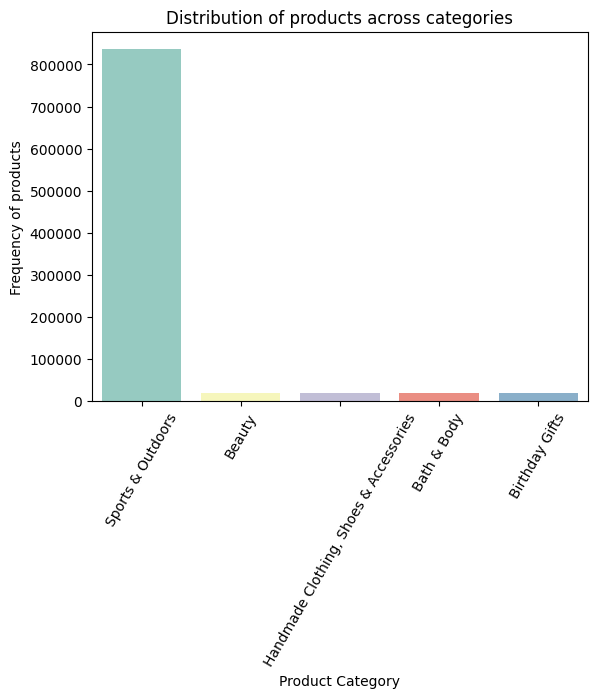

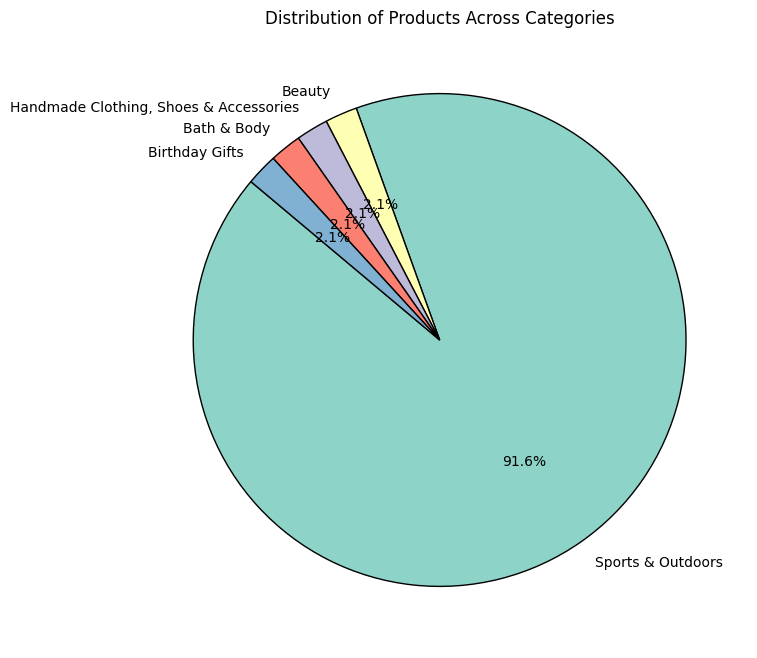

In [3]:
#Business Question: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?


#Frequency Tables:
    # Generate a frequency table for the product category.
frequencies = pd.crosstab(index=df["category"], columns="count")
frequencies = frequencies.sort_values(by="count", ascending=False).head(5)
frequencies

    # Which are the top 5 most listed product categories?
        # Sports&Outdoor, Beauty, Handmade Clothing, Shoes, Bath&Body, Birthday Gifts

#Visualizations:
    # Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart, do it for a subset of top categories.
sns.barplot(x=frequencies.index, y=frequencies["count"], palette="Set3")
plt.title('Distribution of products across categories')
plt.xlabel('Product Category')
plt.ylabel('Frequency of products')
plt.xticks(rotation= 60)

    # For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings? --> YES! Sports & Outdoor
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))  
plt.pie(
    frequencies["count"], 
    labels=frequencies.index,  
    autopct='%1.1f%%',  
    colors=sns.color_palette("Set3"),
    startangle=140,
    wedgeprops={"edgecolor": "black"}
)
plt.title("Distribution of Products Across Categories")
plt.show()


mean of price:89.24380943923663
median of price:19.09
mode of price:0    9.99
Name: price, dtype: float64
variance of price:119445.48532254907
standard deviation of price:345.60886175349884
range of price:100000.0
interquartiles of price:0.25     9.99
0.50    19.09
0.75    45.99
Name: price, dtype: float64


([0], [Text(0, 0, '')])

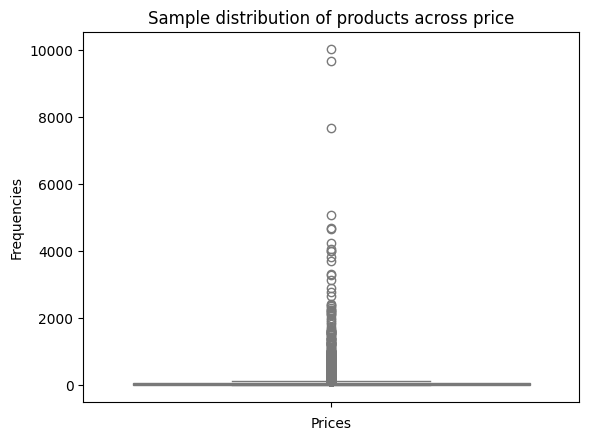

In [4]:
# Part 2: Delving into Product Pricing
# Business Question: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

    # Measures of Centrality:
        # Calculate the mean, median, and mode for the price of products.
mean = df["price"].mean()
median = df["price"].median()
mode = df["price"].mode()

print(f"mean of price:{mean}")
print(f"median of price:{median}")
print(f"mode of price:{mode}")

# 
        # What's the average price point of products listed? How does this compare with the most common price point (mode)?
            # The average price is almost 90€, however, the most common price is 9.99€. This means that Amazon solds mostly cheap products (9.99€), however, higher priced products pull the average price of products up. 

    # Measures of Dispersion:
        # Determine the variance, standard deviation, range, and interquartile range for product price.
variance = df["price"].var()
std_dev = df["price"].std()
min = df["price"].min()
max = df["price"].max()
range = max - min
interquartile = df["price"].quantile([0.25,0.5,0.75])

print(f"variance of price:{variance}")
print(f"standard deviation of price:{std_dev}")
print(f"range of price:{range}")
print(f"interquartiles of price:{interquartile}")

        # How varied are the product prices? Are there any indicators of a significant spread in prices?
            # Yes, there is significant spread in price which is seen by a high range of price (100,000)

    # Visualizations:
        # Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. If its hard to read these diagrams, think why this is, and explain how it could be solved.
#sns.histplot(df['price'], kde=True, color="salmon")
        # Indeed it is hard to read the histogram as the distribution is not well visualized. This might be because of outliers and a high frequency of lower priced products (see mode 9.99€) 

        # Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.
df_sample = df.sample(n=5000, random_state=42)
sns.boxplot(data=df_sample["price"], color="lightblue")
plt.title('Sample distribution of products across price')
plt.xlabel('Prices')
plt.ylabel('Frequencies')
plt.xticks(rotation= 60)

mean of rating:2.152836472966065
median of rating:0.0
mode of rating:0    0.0
Name: stars, dtype: float64
variance of rating:4.817434029796862
standard deviation of rating:2.1948653785134207
range of rating:5.0
interquartiles of rating:0.25     9.99
0.50    19.09
0.75    45.99
Name: price, dtype: float64
skewness of rating:0.08120735761080985
kurtosis of rating:-1.9260061280432985


(array([-2000.,     0.,  2000.,  4000.,  6000.,  8000., 10000., 12000.]),
 [Text(-2000.0, 0, '−2000'),
  Text(0.0, 0, '0'),
  Text(2000.0, 0, '2000'),
  Text(4000.0, 0, '4000'),
  Text(6000.0, 0, '6000'),
  Text(8000.0, 0, '8000'),
  Text(10000.0, 0, '10000'),
  Text(12000.0, 0, '12000')])

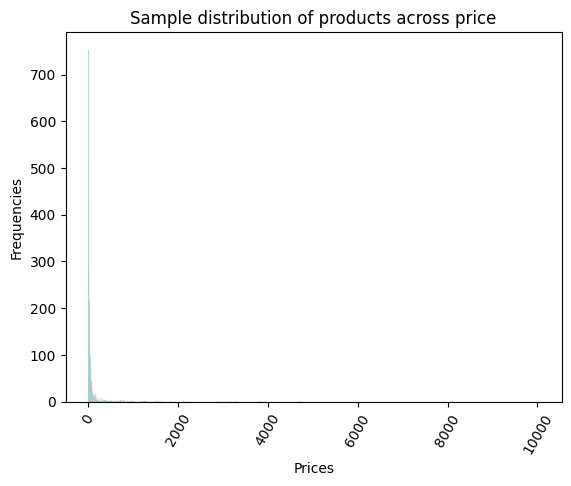

In [ ]:
# Part 3: Unpacking Product Ratings
# Business Question: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

    # Measures of Centrality:
        # Calculate the mean, median, and mode for the rating of products.
mean_rating = df["stars"].mean()
median_rating = df["stars"].median()
mode_rating = df["stars"].mode()

print(f"mean of rating:{mean_rating}")
print(f"median of rating:{median_rating}")
print(f"mode of rating:{mode_rating}")
        # How do customers generally rate products? Is there a common trend?
            # No, there is no common trend. The rating is pretty equally distrubuted with a mean of 2.15 (2.5 would be exactly the middle)

    # Measures of Dispersion:
        # Determine the variance, standard deviation, and interquartile range for product rating.
variance_rating = df["stars"].var()
std_dev_rating = df["stars"].std()
min_rating = df["stars"].min()
max_rating = df["stars"].max()
range_rating = max_rating - min_rating
interquartile_rating = df["price"].quantile([0.25,0.5,0.75])

print(f"variance of rating:{variance_rating}")
print(f"standard deviation of rating:{std_dev_rating}")
print(f"range of rating:{range_rating}")
print(f"interquartiles of rating:{interquartile_rating}")    

        # Are the ratings consistent, or is there a wide variation in customer feedback?
            # No, there is only a small variation in rating due to a given range of 0-5 stars only

    # Shape of the Distribution:
        # Calculate the skewness and kurtosis for the rating column.
skewness_rating = df['stars'].skew()
kurtosis_rating = df['stars'].kurtosis()

print(f"skewness of rating:{skewness_rating}")
print(f"kurtosis of rating:{kurtosis_rating}")

        # Are the ratings normally distributed, or do they lean towards higher or lower values?
            # The skewness of 0.08 points to a normal distriubtion of values. The kurtosis of almost -2 points to a equally, broad distrubution which is indicated by a kurtosis <3.

    # Visualizations:
        # Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common? --> Yes, 0! Probaly, this is because most customers do not rate the products and then, a 0 is allocated. 
df_sample1 = df.sample(n=5000, random_state=42)
sns.histplot(data=df_sample1["price"], color="lightblue")
plt.title('Sample distribution of products across price')
plt.xlabel('Prices')
plt.ylabel('Frequencies')
plt.xticks(rotation= 60)
